<a href="https://colab.research.google.com/github/RosmaDian/RosmaDian/blob/main/Risiko_Kredit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Package

In [ ]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seabor

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv')

<ipython-input-4-211198540226>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv')


# Preprocessing Data

In [ ]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(466285, 75)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
df.isna().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [ ]:
df[df.duplicated()]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m


In [ ]:
cols =['id','member_id','url','desc','zip_code','annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m','sub_grade']
dfnew = df.drop(cols, axis=1)
dfnew = dfnew.drop(dfnew.columns[[0]], axis=1)

In [ ]:
dfnew.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_il_6m,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,NaN,10+ years,RENT,...,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,...,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,NaN,10+ years,RENT,...,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,...,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,University Medical Group,1 year,RENT,...,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN


In [ ]:
dfnew.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [ ]:
status_buruk = ['Charged Off' , 'Default' , 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)'
]

dfnew['red_flag'] = np.where(dfnew['loan_status'].isin(status_buruk), 1, 0)

In [ ]:
dfnew['red_flag'].value_counts()

0    415317
1     50968
Name: red_flag, dtype: int64

In [ ]:
dfnew.drop('loan_status', axis=1, inplace=True)

In [ ]:
#MENGUBAH EMP LENGHT
dfnew['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
dfnew['emp_length_int'] = dfnew['emp_length'].str.replace('\+ years', '')
dfnew['emp_length_int'] = dfnew['emp_length_int'].str.replace('< 1 year', str(0))
dfnew['emp_length_int'] = dfnew['emp_length_int'].str.replace(' years', '')
dfnew['emp_length_int'] = dfnew['emp_length_int'].str.replace(' year', '')

<ipython-input-17-32ff719948c1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dfnew['emp_length_int'] = dfnew['emp_length'].str.replace('\+ years', '')


In [ ]:
dfnew['emp_length_int'] = dfnew['emp_length_int'].astype(float)

In [ ]:
dfnew.drop('emp_length', axis=1, inplace=True)

In [ ]:
dfnew['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [ ]:
#MENGUBAH TERM
dfnew['term_int'] = dfnew['term'].str.replace(' months', '')
dfnew['term_int'] = dfnew['term_int'].astype(float)

In [ ]:
dfnew.drop('term', axis=1, inplace=True)

In [ ]:
dfnew['term_int'].unique()

array([36., 60.])

In [ ]:
dfnew['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [ ]:
#MENGUBAH EARLIEST LINE
dfnew['earliest_cr_line_date'] = pd.to_datetime(dfnew['earliest_cr_line'], format='%b-%y')
dfnew['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [ ]:
dfnew['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - dfnew['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
dfnew['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [ ]:
dfnew['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [ ]:
dfnew[dfnew['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


In [ ]:
dfnew.loc[dfnew['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = dfnew['mths_since_earliest_cr_line'].max()

In [ ]:
dfnew.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

In [ ]:
dfnew['mths_since_earliest_cr_line'].head()

0    395.0
1    224.0
2    193.0
3    262.0
4    263.0
Name: mths_since_earliest_cr_line, dtype: float64

In [ ]:
#MENGUBAH DATA ISSUE
dfnew['issue_d_date'] = pd.to_datetime(dfnew['issue_d'], format='%b-%y')
dfnew['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - dfnew['issue_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
dfnew.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

In [ ]:
#MENGUBAH LAST PAYMENT
dfnew['last_pymnt_d_date'] = pd.to_datetime(dfnew['last_pymnt_d'], format='%b-%y')
dfnew['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - dfnew['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
dfnew.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

In [ ]:
#MENGUBAH NEXT PAYMENT
dfnew['next_pymnt_d_date'] = pd.to_datetime(dfnew['next_pymnt_d'], format='%b-%y')
dfnew['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - dfnew['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
dfnew.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

In [ ]:
#MENGUBAH LATS CREDIT PULL
dfnew['last_credit_pull_d_date'] = pd.to_datetime(dfnew['last_credit_pull_d'], format='%b-%y')
dfnew['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - dfnew['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
dfnew.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

Eksplorasi Data

<ipython-input-40-1eae8f9c02d6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfnew.corr())


<Axes: >

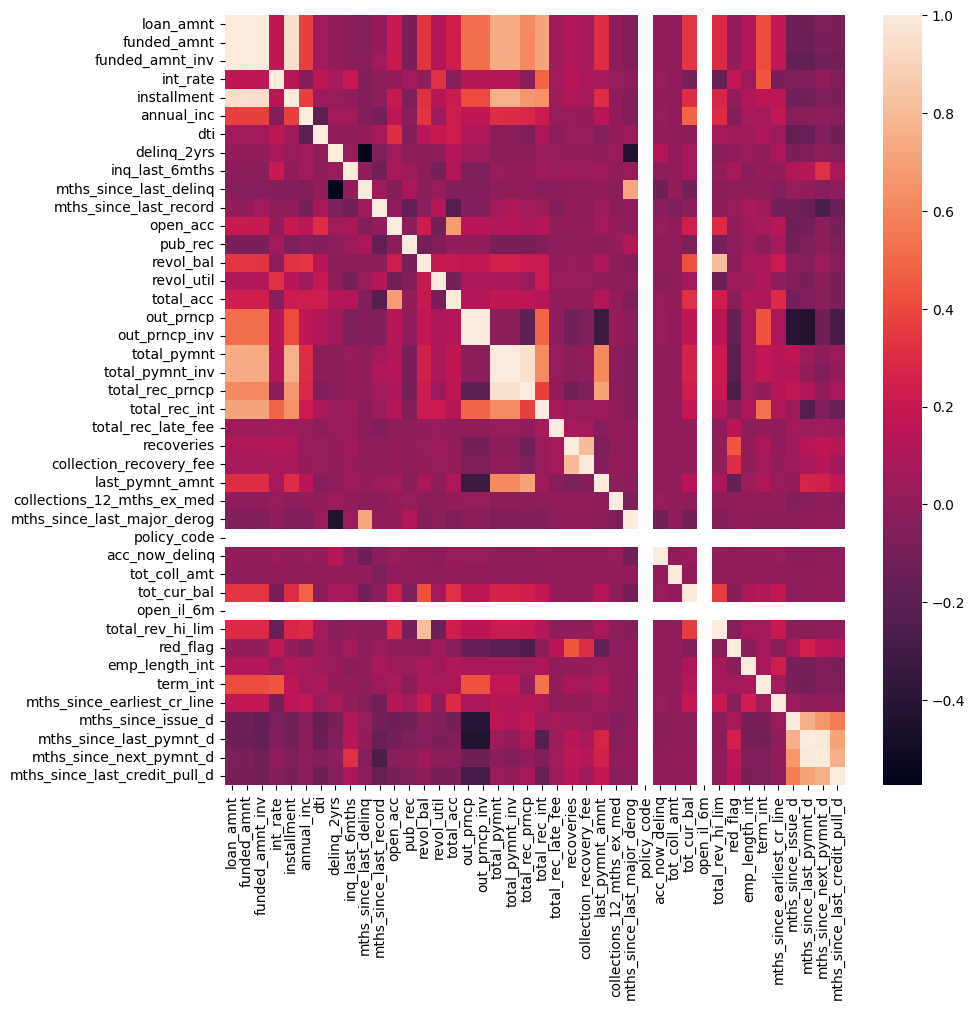

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dfnew.corr())

In [ ]:
corr_matrix = dfnew.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
drop_corr = [column for column in upper.columns if any(upper[column] > 0.7)]

<ipython-input-41-81343abfd7df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dfnew.corr().abs()
<ipython-input-41-81343abfd7df>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
drop_corr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [ ]:
dfnew.drop(drop_corr, axis=1, inplace=True)

Hapus Data Ketegorik

In [ ]:
dfnew.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

In [ ]:
dfnew.drop(['emp_title','title','application_type'], axis=1, inplace=True)

In [ ]:
dfnew.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
open_il_6m                          0
red_flag                            2
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line       515
mths_since_i

In [ ]:
dfnew.drop(['policy_code'], axis=1, inplace=True)

In [ ]:
for col in dfnew.select_dtypes(include='object').columns.tolist():
    print(dfnew[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

In [ ]:
dfnew.drop(['pymnt_plan'], axis=1, inplace=True)

In [ ]:
#PENGECEKKAN MISSING VALUE
missing_value = dfnew.isnull().sum() * 100 / dfnew.shape[0]
missing_value[missing_value > 0].sort_values(ascending=False)

open_il_6m                     100.000000
mths_since_last_record          86.566585
mths_since_last_delinq          53.690554
tot_coll_amt                    15.071469
tot_cur_bal                     15.071469
emp_length_int                   4.505399
revol_util                       0.072917
collections_12_mths_ex_med       0.031097
delinq_2yrs                      0.006219
inq_last_6mths                   0.006219
open_acc                         0.006219
pub_rec                          0.006219
total_acc                        0.006219
acc_now_delinq                   0.006219
mths_since_earliest_cr_line      0.006219
annual_inc                       0.000858
dtype: float64

In [ ]:
dfnew.drop(['open_il_6m','mths_since_last_record'], axis=1, inplace=True)

In [ ]:
dfnew['annual_inc'].fillna(dfnew['annual_inc'].mean(), inplace=True)
dfnew['mths_since_earliest_cr_line'].fillna(0, inplace=True)
dfnew['acc_now_delinq'].fillna(0, inplace=True)
dfnew['total_acc'].fillna(0, inplace=True)
dfnew['pub_rec'].fillna(0, inplace=True)
dfnew['open_acc'].fillna(0, inplace=True)
dfnew['inq_last_6mths'].fillna(0, inplace=True)
dfnew['delinq_2yrs'].fillna(0, inplace=True)
dfnew['collections_12_mths_ex_med'].fillna(0, inplace=True)
dfnew['revol_util'].fillna(0, inplace=True)
dfnew['emp_length_int'].fillna(0, inplace=True)
dfnew['tot_cur_bal'].fillna(0, inplace=True)
dfnew['tot_coll_amt'].fillna(0, inplace=True)
dfnew['mths_since_last_delinq'].fillna(-1, inplace=True)

In [ ]:
categorical_cols = [col for col in dfnew.select_dtypes(include='object').columns.tolist()]

In [ ]:
onehot = pd.get_dummies(dfnew[categorical_cols], drop_first=True)

In [ ]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


STANDARISASI

In [ ]:
numerical_cols = [col for col in dfnew.columns.tolist() if col not in categorical_cols + ['red_flag']]

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(dfnew[numerical_cols]), columns=numerical_cols)

TRANSFORMASI

In [ ]:
data_model = pd.concat([onehot, std, dfnew[['red_flag']]], axis=1)

In [ ]:
data_model.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,red_flag
0,1,0,0,0,0,0,0,0,0,0,...,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.764941,1.446626,0
1,0,1,0,0,0,0,0,0,0,0,...,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-1.523744,1.622784,-0.212426,1.446626,1
2,0,1,0,0,0,0,0,0,0,0,...,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,-0.570896,1.446626,0
3,0,1,0,0,0,0,0,0,0,0,...,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,0.226989,1.446626,0
4,1,0,0,0,0,0,0,0,0,0,...,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-1.257509,1.622784,0.238553,1.446626,0


#Modeling

In [ ]:
from sklearn.model_selection import train_test_split
X = data_model.drop('red_flag', axis=1)
y = data_model['red_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((373028, 99), (93257, 99))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [ ]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values

df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
90,recoveries,0.520789
88,out_prncp,0.207966
89,total_rec_late_fee,0.083041
77,int_rate,0.059147
98,mths_since_issue_d,0.016786
...,...,...
73,addr_state_WV,0.000000
71,addr_state_WA,0.000000
70,addr_state_VT,0.000000
69,addr_state_VA,0.000000


In [ ]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

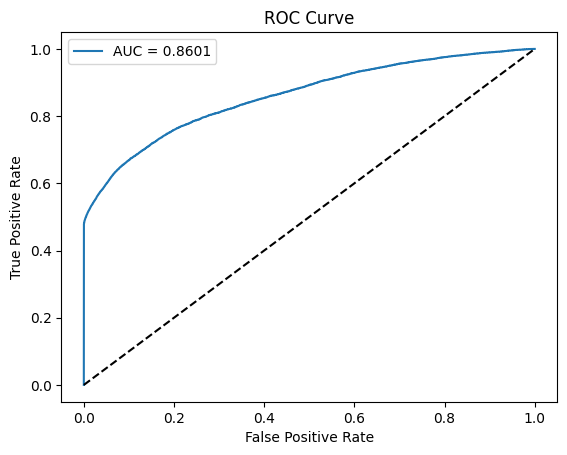

In [ ]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

pred_rfc = rfc.predict(X_test)
print("The accuracy of RF model is:", accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

The accuracy of RF model is: 0.9032458689428139
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     83067
           1       1.00      0.11      0.21     10190

    accuracy                           0.90     93257
   macro avg       0.95      0.56      0.58     93257
weighted avg       0.91      0.90      0.87     93257



In [ ]:
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression()
logit.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_proba1 = logit.predict_proba(X_test)[:][:,1]

df_actual_predicted1 = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba1, columns=['y_pred_proba1'])], axis=1)
df_actual_predicted1.index = y_test.index

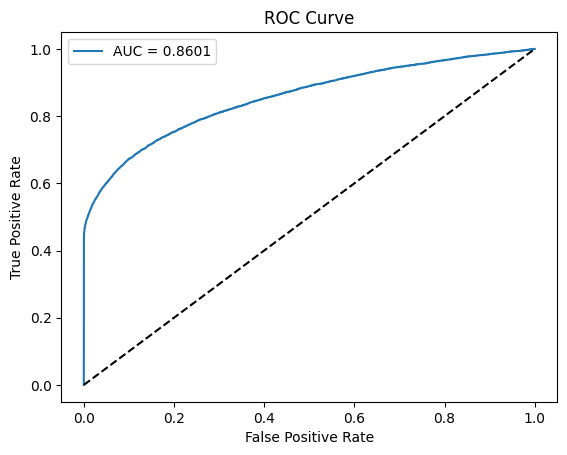

In [ ]:
fpr1, tpr1, tr1 = roc_curve(df_actual_predicted1['y_actual'], df_actual_predicted1['y_pred_proba1'])
auc1 = roc_auc_score(df_actual_predicted1['y_actual'], df_actual_predicted1['y_pred_proba1'])

plt.plot(fpr1, tpr1, label='AUC = %0.4f' %auc)
plt.plot(fpr1, fpr1, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

pred_logit = logit.predict(X_test)
print("The accuracy of Logit model is:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

The accuracy of Logit model is: 0.93961847368026
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     83067
           1       0.98      0.46      0.62     10190

    accuracy                           0.94     93257
   macro avg       0.96      0.73      0.79     93257
weighted avg       0.94      0.94      0.93     93257



In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'max_features': [2, 3],
    'n_estimators': [100, 200]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'max_features': 3, 'n_estimators': 200}

In [ ]:
best_grid = grid_search.best_estimator_
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

pred_rfc1 = best_grid.predict(X_test)
print("The accuracy of model is:", accuracy_score(y_test, pred_rfc1))
print(classification_report(y_test, pred_rfc1))

The accuracy of model is: 0.9428461134284826
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     83067
           1       1.00      0.48      0.65     10190

    accuracy                           0.94     93257
   macro avg       0.97      0.74      0.81     93257
weighted avg       0.95      0.94      0.93     93257

